In [1]:
import pandas as pd #결과값을 데이터프레임 객체로 저장하기 위해 이용
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# matplotlib 그래프를 위한 설정
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
# Load the data
file_path = 'youtube_channel_comments_data_20240606_104600.csv'
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the data to understand its structure
data.head()


,channelId,channelTitle,channelPublishedAt,subscriberCount,videoId,videoTitle,videoAuthorId,videoPublishedAt,duration,viewCount,likeCount,dislikeCount,commentId,commentAuthor,authorId,commentText,commentLikeCount,commentPublishedAt,parentCommentId
0,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,qlLkiUU0o1A,우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-06-05T08:18:39Z,PT56S,19765,339,0,UgxIwrowVdyFJFZloPx4AaABAg,@user-en3wv3ng8q,UCJZMfxEsrCsfkECnVQx1J5g,야채 많이드시고 가끔 요구르트 챙겨드시면\n어느정도 예방됨,0,2024-06-05T19:32:41Z,NaN
1,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,qlLkiUU0o1A,우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-06-05T08:18:39Z,PT56S,19765,339,0,UgzzY7tk7b81qVjPlu14AaABAg,@user-fb4hd5lg1v,UCtTgUzxcR7KXdKUG4k3qTLA,제일 확실한건 변비 설사 반복 됩니다 꼭 검사해보셔요,2,2024-06-05T11:11:22Z,NaN
2,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,qlLkiUU0o1A,우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-06-05T08:18:39Z,PT56S,19765,339,0,UgwWLF6ds6wSe2lU6DN4AaABAg,@inuyasha1017,UCEAlDUqmaikJpmie3nAIozg,좋은정보 감사합니다 😊😊😊,0,2024-06-05T10:43:46Z,NaN
3,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,qlLkiUU0o1A,우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-06-05T08:18:39Z,PT56S,19765,339,0,UgxDtXAN64oybfbaEDF4AaABAg,@user-cj6rk5qn9o,UC2HHPaUByk-R9ykbP3yjsaQ,걸리면 하느님 만나로 올라갈게요,1,2024-06-05T10:11:54Z,NaN
4,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,2017-03-02T02:28:38Z,1780000,qlLkiUU0o1A,우리 몸에 대장암이 생길때 나타나는 위험신호 #대장암#위험신호,UCMFk5S7g5DY-CZNVh_Kyz_A,2024-06-05T08:18:39Z,PT56S,19765,339,0,Ugx946j7jz6kQr-vDsh4AaABAg,@user-ye5ne4mc6d,UCQ0eOpBzyy1vgyF4nUTAb_Q,이중에 하나도 해당 안됐는데\n대장암 4기..,10,2024-06-05T08:33:27Z,NaN


In [5]:
# Data preprocessing to get statistics
# Dropping duplicates based on commentId to count unique comments
unique_comments = data.drop_duplicates(subset='commentId')

# Group by channelId and calculate the required statistics
channel_stats = unique_comments.groupby('channelId').agg(
    channelTitle=('channelTitle', 'first'),
    videoCount=('videoId', 'nunique'),
    commentCount=('commentId', 'count')
).reset_index()



In [6]:
# Display the statistics in a table format
from IPython.display import display
display(channel_stats)


,channelId,channelTitle,videoCount,commentCount
0,UC3iSLVH0MxHfwO69oHKpvog,리틀약사,222,9314
1,UC6ggXTuBVchhwHeQ12Ita1w,친한미국약사 PharmacistPal,35,2421
2,UCCMFTDGarjgZLc1DlIbbvRg,이지약사tv,46,471
3,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,79,38324
4,UCY-mXLM6DsS9cmSwlh0tqSA,영양과학자 양과자,109,5872


각 채널별 월별 통계 데이터를 표로 작성하여 제공했습니다. 각 항목은 등록 영상 수, 영상 좋아요 수, 싫어요 수, 댓글 수로 구성되어 있습니다.

In [7]:
# Convert videoPublishedAt to datetime
data['videoPublishedAt'] = pd.to_datetime(data['videoPublishedAt'])

# Extract year and month from videoPublishedAt
data['year_month'] = data['videoPublishedAt'].dt.to_period('M')

# Group by channelId, year_month and calculate the required statistics
monthly_stats = data.groupby(['channelId', 'year_month']).agg(
    channelTitle=('channelTitle', 'first'),
    videoCount=('videoId', 'nunique'),
    likeCount=('likeCount', 'sum'),
    dislikeCount=('dislikeCount', 'sum'),
    commentCount=('commentId', 'count')
).reset_index()

# Rename year_month to a more readable format
monthly_stats['year_month'] = monthly_stats['year_month'].astype(str)

# Display the monthly statistics in a table format
from IPython.display import display
display(monthly_stats)

/tmp/ipykernel_35196/2712914788.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['year_month'] = data['videoPublishedAt'].dt.to_period('M')


,channelId,year_month,channelTitle,videoCount,likeCount,dislikeCount,commentCount
0,UC3iSLVH0MxHfwO69oHKpvog,2023-06,리틀약사,9,206007,0,389
1,UC3iSLVH0MxHfwO69oHKpvog,2023-07,리틀약사,17,379219,0,487
2,UC3iSLVH0MxHfwO69oHKpvog,2023-08,리틀약사,19,4649689,0,1484
3,UC3iSLVH0MxHfwO69oHKpvog,2023-09,리틀약사,18,415620,0,391
4,UC3iSLVH0MxHfwO69oHKpvog,2023-10,리틀약사,21,898899,0,561
...,...,...,...,...,...,...,...
56,UCY-mXLM6DsS9cmSwlh0tqSA,2024-02,영양과학자 양과자,16,62897,0,507
57,UCY-mXLM6DsS9cmSwlh0tqSA,2024-03,영양과학자 양과자,7,939522,0,904
58,UCY-mXLM6DsS9cmSwlh0tqSA,2024-04,영양과학자 양과자,5,13636,0,130
59,UCY-mXLM6DsS9cmSwlh0tqSA,2024-05,영양과학자 양과자,8,112722,0,384


In [8]:
# Plotting function for each channel
def plot_channel_stats(channel_id, channel_name, df):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    
    color = 'tab:blue'
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Video Count', color=color)
    ax1.plot(df['year_month'], df['videoCount'], color=color, marker='o', label='Video Count')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')
    
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('Counts', color=color)
    ax2.plot(df['year_month'], df['likeCount'], color='tab:green', marker='x', label='Like Count')
    ax2.plot(df['year_month'], df['dislikeCount'], color='tab:orange', marker='x', label='Dislike Count')
    ax2.plot(df['year_month'], df['commentCount'], color=color, marker='x', label='Comment Count')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')
    
    fig.tight_layout()
    plt.title(f'Monthly Statistics for {channel_name}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

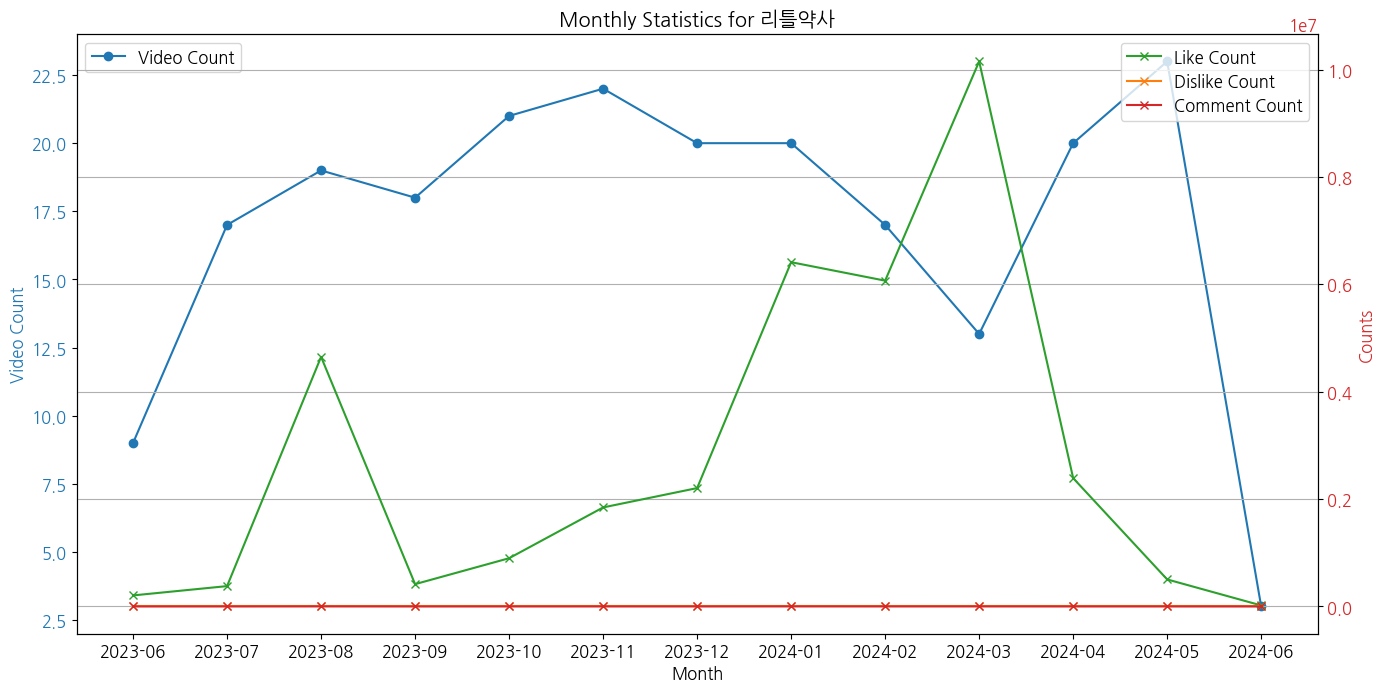

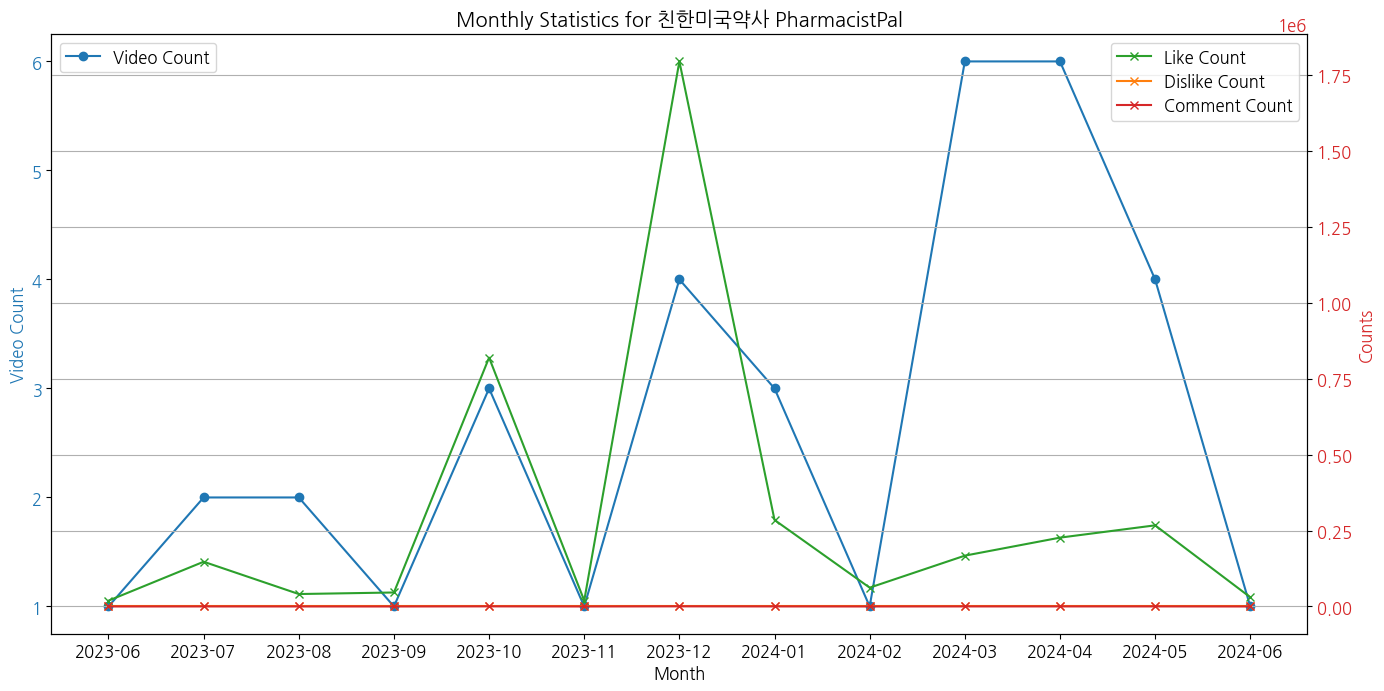

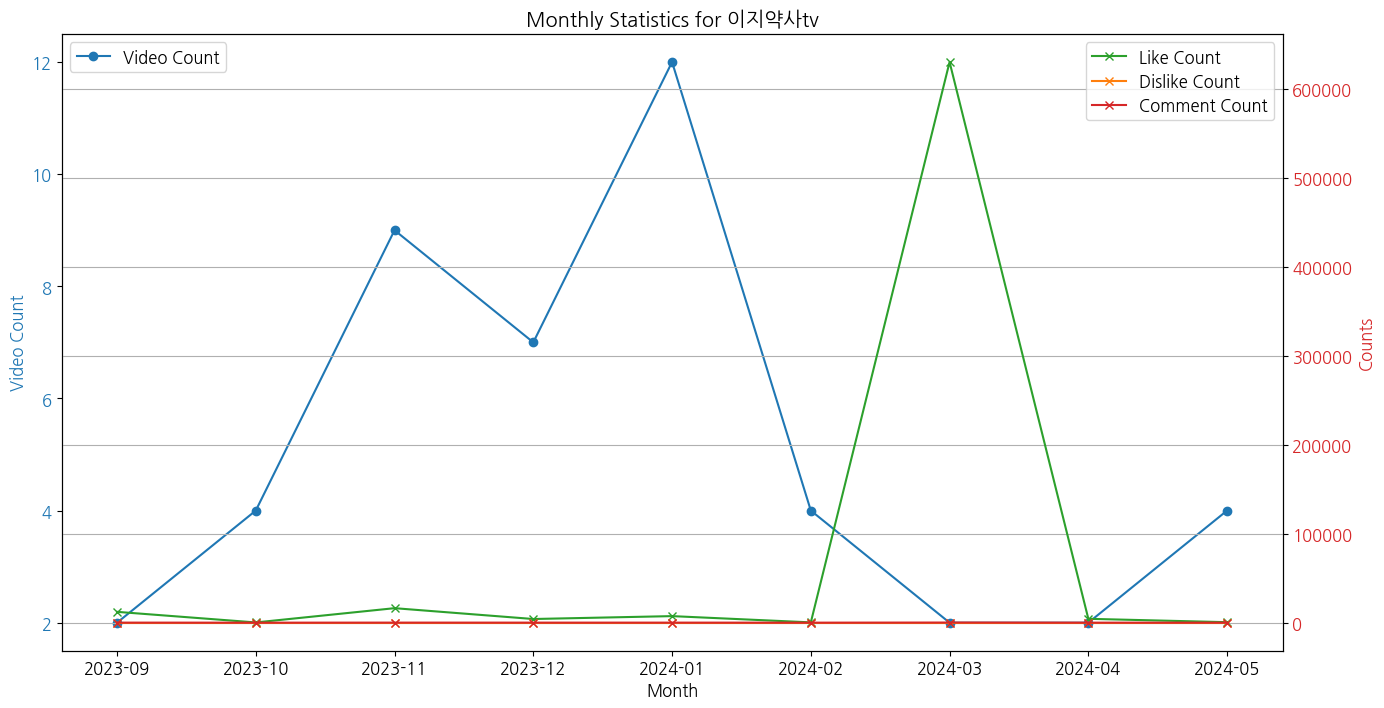

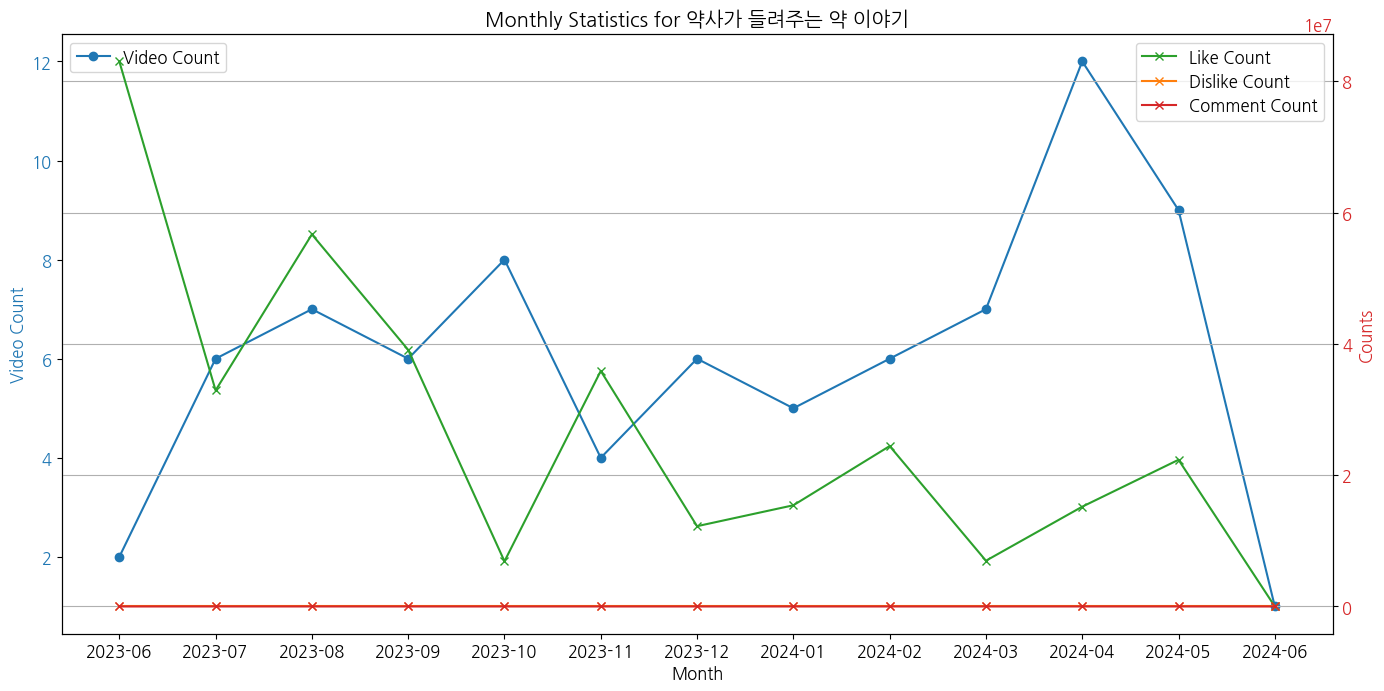

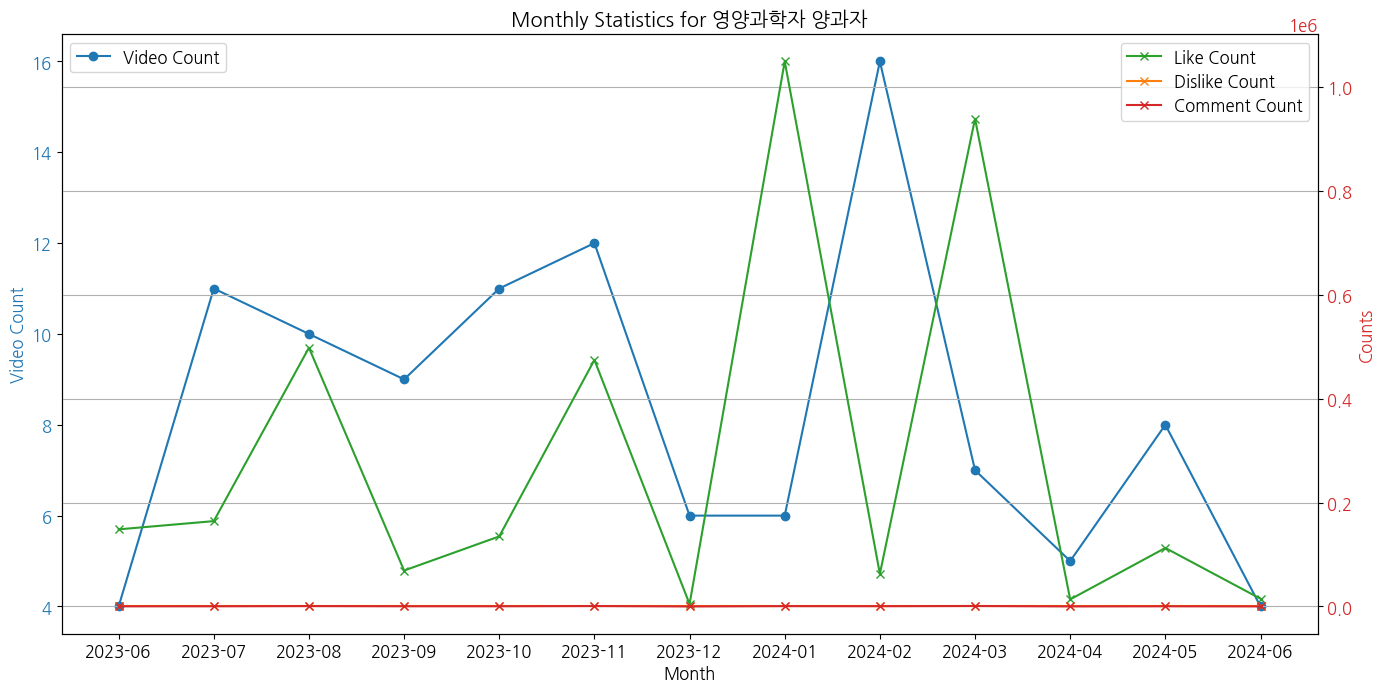

In [9]:
# Get unique channels
channels = monthly_stats['channelId'].unique()

# Plot stats for each channel
for channel_id in channels:
    channel_name = monthly_stats[monthly_stats['channelId'] == channel_id]['channelTitle'].values[0]
    channel_data = monthly_stats[monthly_stats['channelId'] == channel_id]
    plot_channel_stats(channel_id, channel_name, channel_data)

각 채널별, 채널 구독자 수, 유니크한 댓글 작성자 수를 표로 정리했습니다.

In [10]:
# Calculate unique commenters per channel per month
unique_commenters = data.drop_duplicates(subset=['channelId', 'year_month', 'authorId'])

# Group by channelId to get the count of unique commenters
unique_commenter_stats = unique_commenters.groupby(['channelId', 'year_month']).agg(
    channelTitle=('channelTitle', 'first'),
    subscriberCount=('subscriberCount', 'first'),
    uniqueCommenters=('authorId', 'nunique')
).reset_index()

# Calculate total unique commenters per channel
total_unique_commenters = unique_commenter_stats.groupby('channelId').agg(
    channelTitle=('channelTitle', 'first'),
    subscriberCount=('subscriberCount', 'first'),
    uniqueCommenters=('uniqueCommenters', 'sum')
).reset_index()

# Display the statistics in a table format
from IPython.display import display
display(total_unique_commenters)

,channelId,channelTitle,subscriberCount,uniqueCommenters
0,UC3iSLVH0MxHfwO69oHKpvog,리틀약사,454000,5584
1,UC6ggXTuBVchhwHeQ12Ita1w,친한미국약사 PharmacistPal,55300,1534
2,UCCMFTDGarjgZLc1DlIbbvRg,이지약사tv,5720,203
3,UCMFk5S7g5DY-CZNVh_Kyz_A,약사가 들려주는 약 이야기,1780000,18548
4,UCY-mXLM6DsS9cmSwlh0tqSA,영양과학자 양과자,175000,2410


지난 1년간 각 채널의 월별 유니크한 댓글 작성자 수의 통계를 표로 정리했습니다.

In [11]:
# Convert the videoPublishedAt column to UTC to ensure compatibility in comparison
data['videoPublishedAt'] = pd.to_datetime(data['videoPublishedAt']).dt.tz_convert(None)

# Filter data for the past year
past_year = pd.Timestamp('now') - pd.DateOffset(years=1)
recent_data = data[data['videoPublishedAt'] >= past_year]

# Drop duplicates based on channelId, year_month, and authorId
unique_commenters_recent = recent_data.drop_duplicates(subset=['channelId', 'year_month', 'authorId'])

# Group by channelId and year_month to get the count of unique commenters
unique_commenter_stats_recent = unique_commenters_recent.groupby(['channelId', 'year_month']).agg(
    channelTitle=('channelTitle', 'first'),
    subscriberCount=('subscriberCount', 'first'),
    uniqueCommenters=('authorId', 'nunique')
).reset_index()

# Display the statistics in a table format
display(unique_commenter_stats_recent)


,channelId,year_month,channelTitle,subscriberCount,uniqueCommenters
0,UC3iSLVH0MxHfwO69oHKpvog,2023-06,리틀약사,454000,173
1,UC3iSLVH0MxHfwO69oHKpvog,2023-07,리틀약사,454000,260
2,UC3iSLVH0MxHfwO69oHKpvog,2023-08,리틀약사,454000,917
3,UC3iSLVH0MxHfwO69oHKpvog,2023-09,리틀약사,454000,215
4,UC3iSLVH0MxHfwO69oHKpvog,2023-10,리틀약사,454000,320
5,UC3iSLVH0MxHfwO69oHKpvog,2023-11,리틀약사,454000,392
6,UC3iSLVH0MxHfwO69oHKpvog,2023-12,리틀약사,454000,368
7,UC3iSLVH0MxHfwO69oHKpvog,2024-01,리틀약사,454000,822
8,UC3iSLVH0MxHfwO69oHKpvog,2024-02,리틀약사,454000,530
9,UC3iSLVH0MxHfwO69oHKpvog,2024-03,리틀약사,454000,864


In [14]:
# Plotting function for each channel with unique commenters per month
def plot_monthly_unique_commenters(channel_id, channel_name, df):
    fig, ax = plt.subplots(figsize=(14, 7))
    
    ax.set_xlabel('Month')
    ax.set_ylabel('Unique Commenters')
    ax.plot(df['year_month'], df['uniqueCommenters'], marker='o', label='Unique Commenters', color='tab:blue')
    ax.tick_params(axis='y')
    ax.legend(loc='upper left')
    
    fig.tight_layout()
    plt.title(f'Monthly Unique Commenters for {channel_name}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


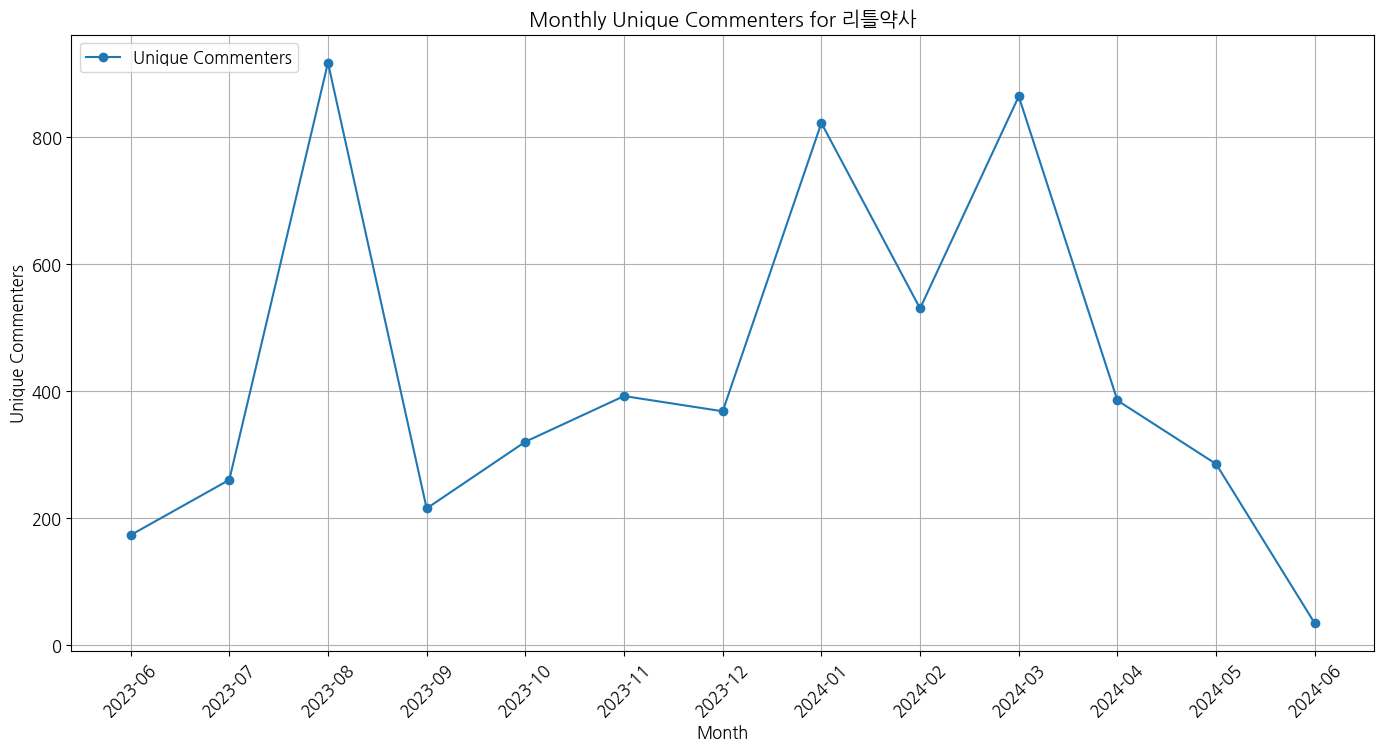

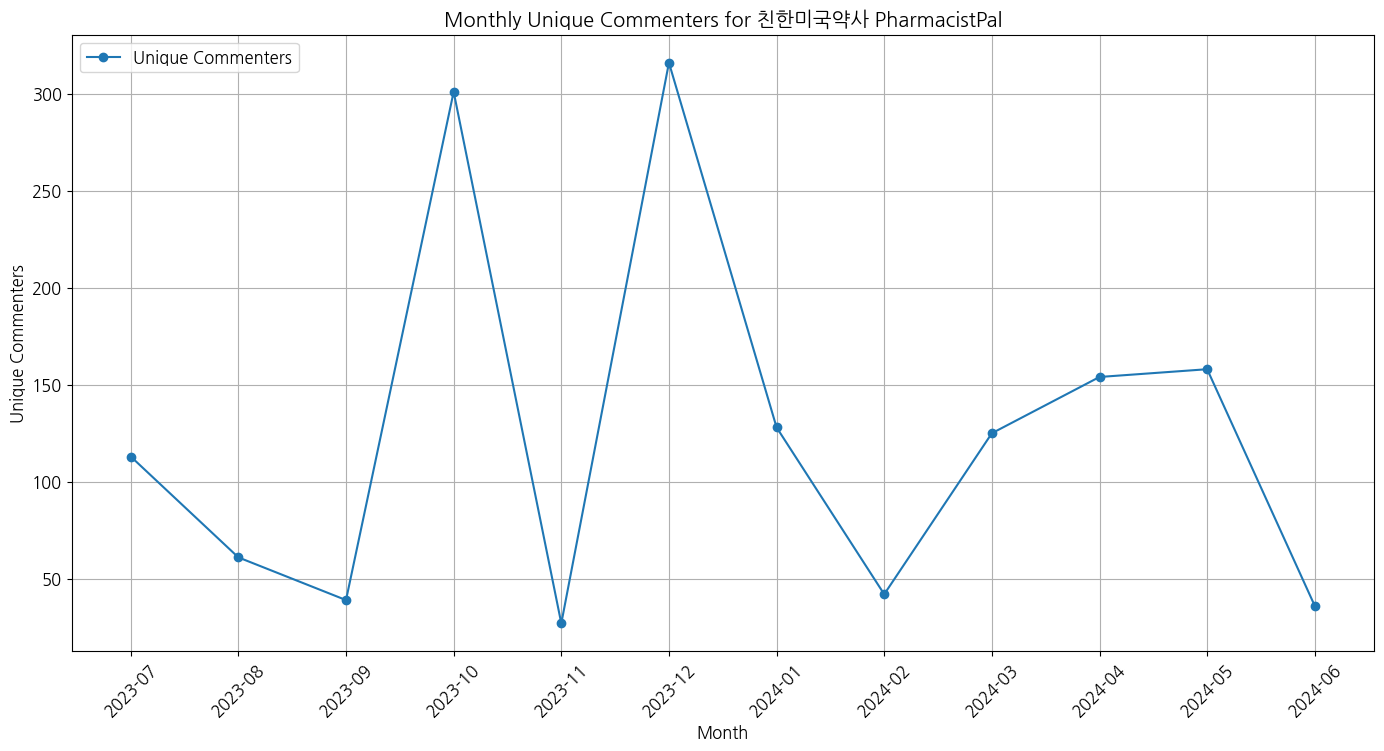

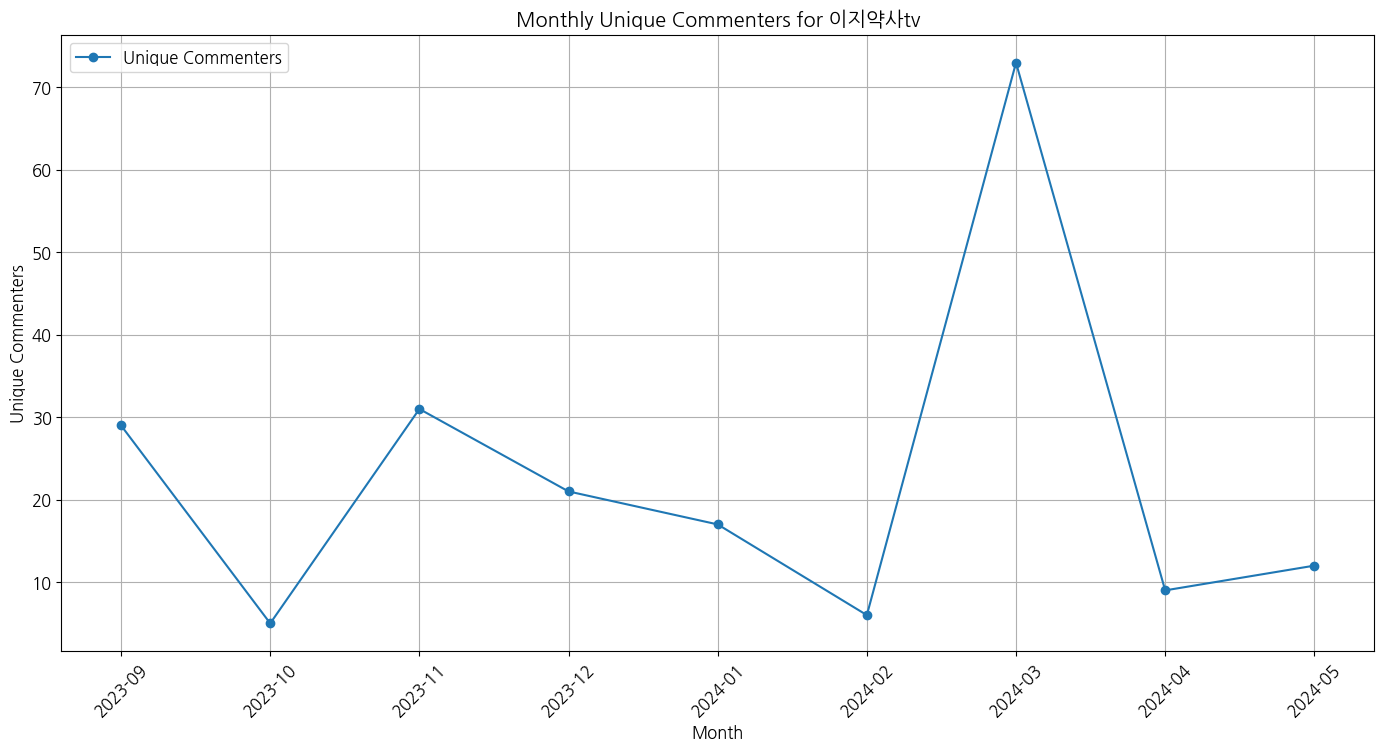

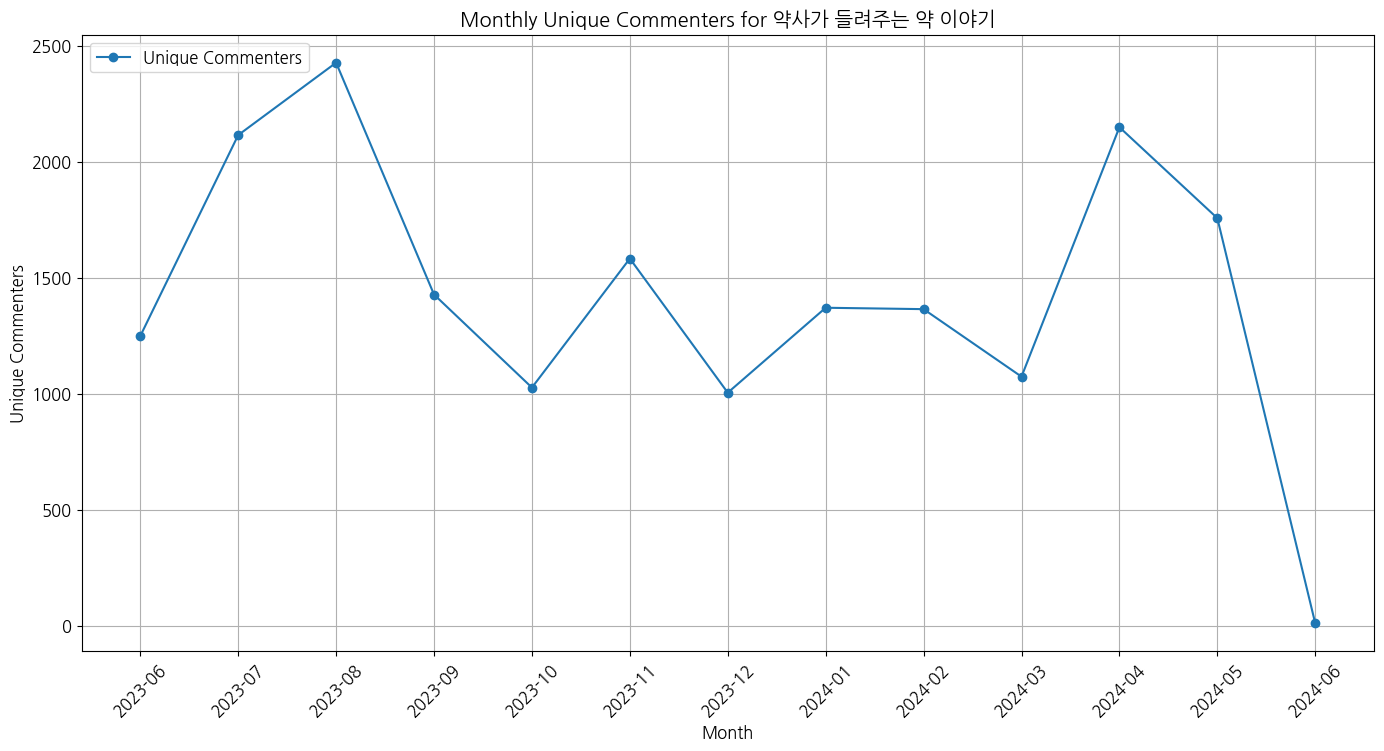

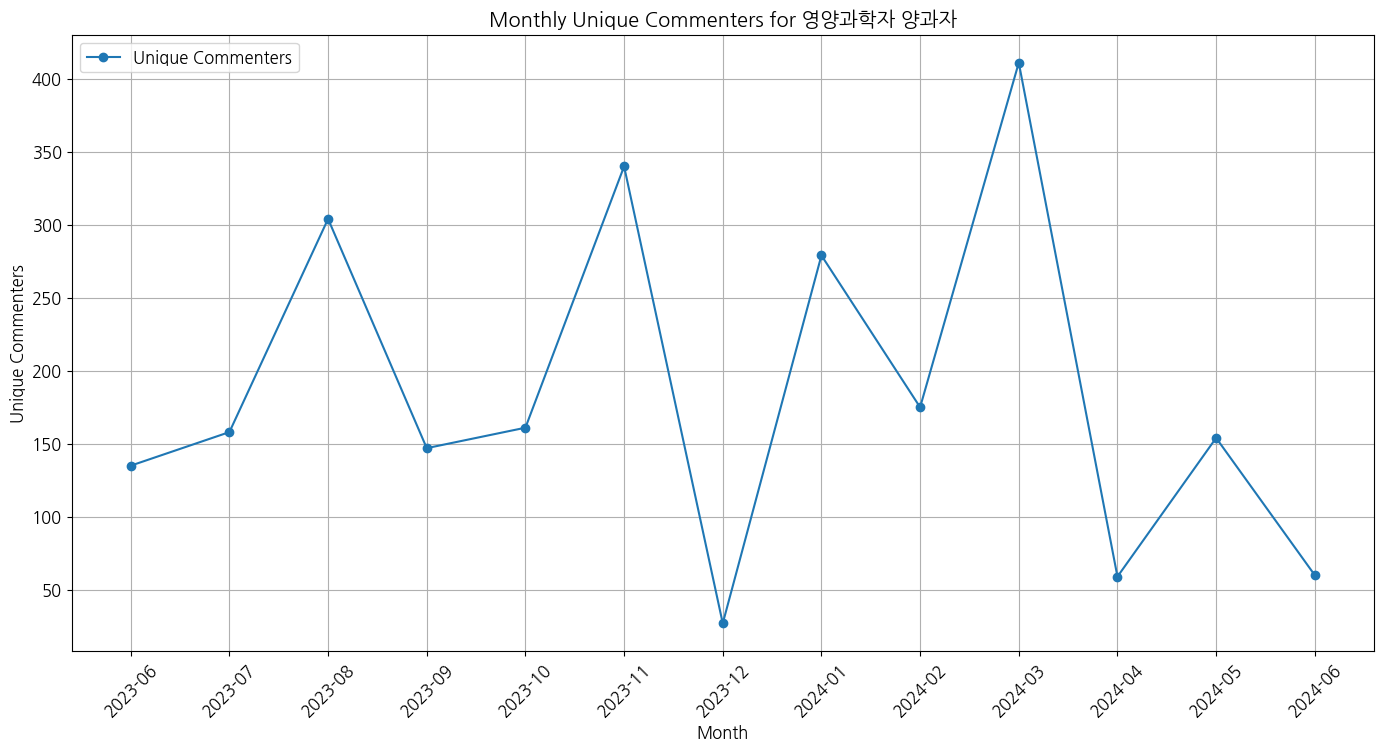

In [15]:
# Convert 'year_month' back to string to avoid Period type issues with plotting
unique_commenter_stats_recent['year_month'] = unique_commenter_stats_recent['year_month'].astype(str)


# Plot stats for each channel
for channel_id in channels:
    channel_name = unique_commenter_stats_recent[unique_commenter_stats_recent['channelId'] == channel_id]['channelTitle'].values[0]
    channel_data = unique_commenter_stats_recent[unique_commenter_stats_recent['channelId'] == channel_id]
    plot_monthly_unique_commenters(channel_id, channel_name, channel_data)

월별 댓글 작성자 수를 각 채널별로 다른 색상으로 구분하여 하나의 차트로 시각화했습니다. 

각 채널의 월별 유니크한 댓글 작성자 수를 확인할 수 있습니다. 

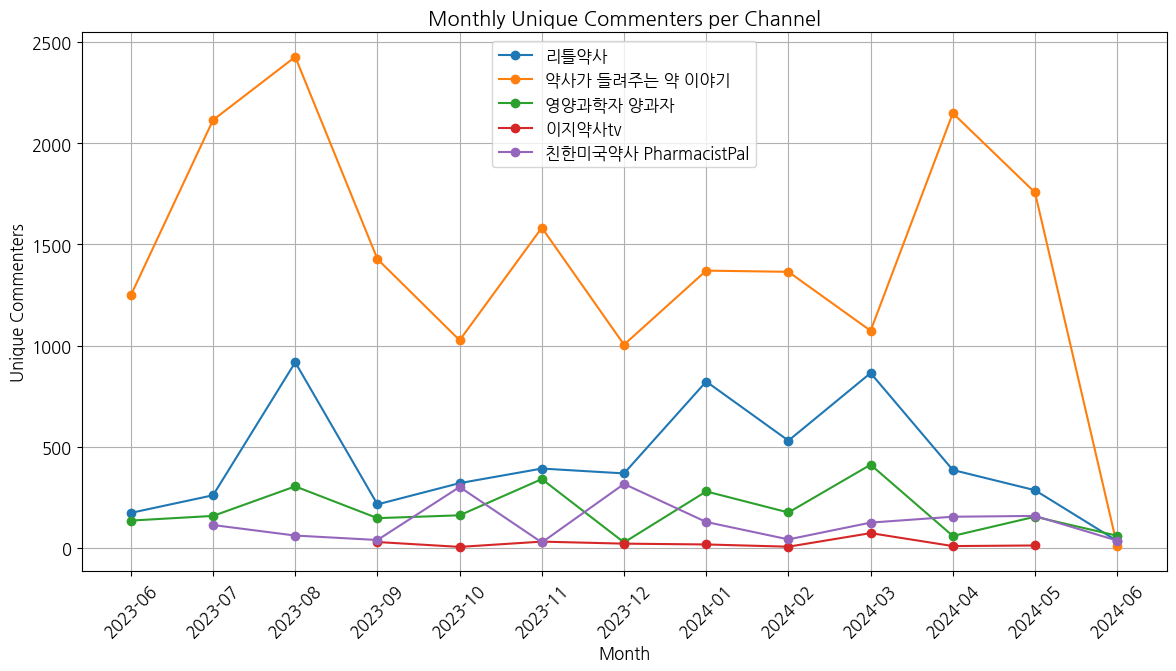

In [16]:
# Filter data to include only relevant columns
unique_commenter_stats_recent_filtered = unique_commenter_stats_recent[['channelId', 'year_month', 'channelTitle', 'uniqueCommenters']]

# Pivot the table to have months as index and channels as columns
pivot_data = unique_commenter_stats_recent_filtered.pivot(index='year_month', columns='channelTitle', values='uniqueCommenters')

# Plotting the pivoted data
plt.figure(figsize=(14, 7))

for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)

plt.xlabel('Month')
plt.ylabel('Unique Commenters')
plt.title('Monthly Unique Commenters per Channel')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
